## $Cmc2_1$ NonSOC Test

In [161]:
from pymatgen.io.vasp.outputs import Waveder, Eigenval

In [162]:
cmc2_1_nonSOC_WAVEDER = Waveder("./Cmc2_1_nonSOC_WAVEDER")
cmc2_1_nonSOC_EIGENVAL = Eigenval("./Cmc2_1_nonSOC_EIGENVAL")

In [157]:
cmc2_1_nonSOC_WAVEDER.cder_data.shape

(210, 132, 26, 1, 3)

In [158]:
cmc2_1_nonSOC_WAVEDER.get_orbital_derivative_between_states(66-1, 67-1, 13-1, 0, 0)

(0.9322433-0.046697907j)

Just for band 66 to band 67:

0.00000 	 Delta E: 1.92 	 @ [0.0, 0.0, 0.0]
0.02837 	 Delta E: 1.94 	 @ [0.1666667, -5.805875e-18, 0.0]
0.06188 	 Delta E: 2.40 	 @ [0.3333333, -7.265994e-18, 0.0]
0.00000 	 Delta E: 2.73 	 @ [0.5, -3.484904e-17, 0.0]
0.02237 	 Delta E: 2.24 	 @ [0.1666667, 0.1666667, 0.0]
0.02370 	 Delta E: 2.89 	 @ [0.3333333, 0.1666667, 0.0]
0.07398 	 Delta E: 2.68 	 @ [0.5, 0.1666667, 0.0]
0.00470 	 Delta E: 1.99 	 @ [-0.3333333, 0.1666667, 0.0]
0.00888 	 Delta E: 1.79 	 @ [-0.1666667, 0.1666667, 0.0]
0.01736 	 Delta E: 2.89 	 @ [0.3333333, 0.3333333, 0.0]
0.00198 	 Delta E: 2.26 	 @ [0.5, 0.3333333, 0.0]
0.00239 	 Delta E: 1.55 	 @ [-0.3333333, 0.3333333, 0.0]
0.01312 	 Delta E: 1.23 	 @ [0.5, 0.5, 0.0]
0.00013 	 Delta E: 2.11 	 @ [0.0, 0.0, 0.5]
0.00916 	 Delta E: 2.05 	 @ [0.1666667, -5.805875e-18, 0.5]
0.00783 	 Delta E: 2.62 	 @ [0.3333333, -7.265994e-18, 0.5]
0.00268 	 Delta E: 2.92 	 @ [0.5, -3.484904e-17, 0.5]
0.00414 	 Delta E: 2.46 	 @ [0.1666667, 0.1666667, 0.5]
0.00847 	 Delta E: 3.05 	

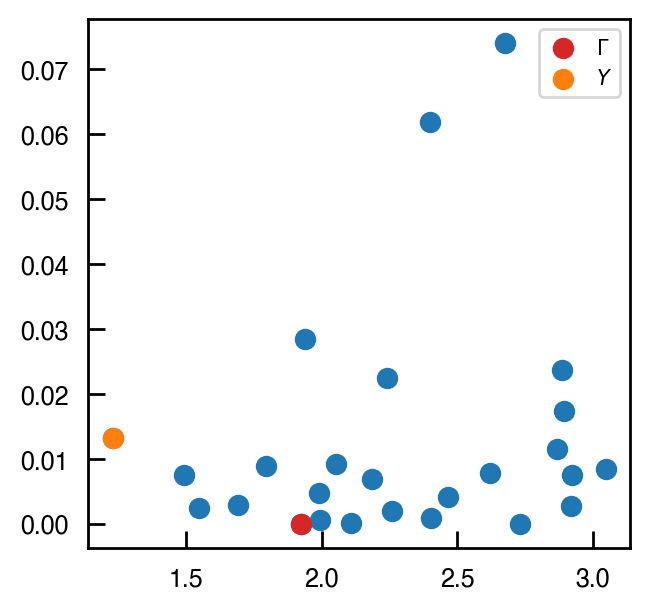

In [307]:
import numpy as np
import matplotlib.pyplot as plt

f,ax = plt.subplots(dpi=200)

tdm_sum = 0
energies = []
tdms = []
for i in range(cmc2_1_nonSOC_WAVEDER.nkpoints):
    energy_diff = cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][67-1][0] - cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][66-1][0]
    energies += [energy_diff]
    kpoint_tdm = 0
    for cart in range(2):
        weighted_tdm = (np.abs(cmc2_1_nonSOC_WAVEDER.get_orbital_derivative_between_states(66-1, 67-1, i, 0, cart))**2) * cmc2_1_nonSOC_EIGENVAL.kpoints_weights[i]
        tdm_sum += weighted_tdm
        kpoint_tdm += weighted_tdm
    tdms += [kpoint_tdm]
    print(f"{kpoint_tdm:.5f} \t Delta E: {energy_diff:.2f} \t @ {cmc2_1_nonSOC_EIGENVAL.kpoints[i]}")
print(f"{tdm_sum:.2f}")

ax.scatter(energies, tdms, s=45, c="C0", marker="o")
ax.scatter(energies[0], tdms[0], s=45, c="C3", marker="o", label=r"$\Gamma$")
ax.scatter(energies[13-1], tdms[13-1], s=45, c="C1", marker="o", label=r"$Y$")
ax.legend()

In [287]:
from vaspwfc import vaspwfc

In [288]:
cmc2_1_nonSOC_WAVECAR = vaspwfc("Cmc2_1_nonSOC_WAVECAR")

```python
return E1, E2, dE, ovlap, tdm
```

In [296]:
cmc2_1_nonSOC_WAVECAR.TransitionDipoleMoment([1, 13, 66], [1, 13, 67])

(4.240547397531383,
 5.469999853483513,
 1.2294524559521296,
 (-6.624141574463629e-08+1.0225736482520468e-08j),
 array([-4.48574011e+00+2.24700658e-01j,  1.29947360e+00-6.50993171e-02j,
        -1.71244604e-06-1.91051745e-06j]))

In [300]:
tdm = np.abs(np.array(cmc2_1_nonSOC_WAVECAR.TransitionDipoleMoment([1, 13, 66], [1, 13, 67])[-1])**2)
tdm

array([2.01723547e+01, 1.69286957e+00, 6.58254838e-12])

Maybe worth pointing out the TDM is zero along the z direction, so equal parity of VBM and CBM WFs in this direction.

0.44543 	 Delta E: 1.92 	 @ [0.0, 0.0, 0.0]
1.37383 	 Delta E: 1.94 	 @ [0.1666667, -5.805875e-18, 0.0]
1.28600 	 Delta E: 2.40 	 @ [0.3333333, -7.265994e-18, 0.0]
0.45827 	 Delta E: 2.73 	 @ [0.5, -3.484904e-17, 0.0]
0.38779 	 Delta E: 2.24 	 @ [0.1666667, 0.1666667, 0.0]
0.64821 	 Delta E: 2.89 	 @ [0.3333333, 0.1666667, 0.0]
1.95845 	 Delta E: 2.68 	 @ [0.5, 0.1666667, 0.0]
0.85147 	 Delta E: 1.99 	 @ [-0.3333333, 0.1666667, 0.0]
0.46304 	 Delta E: 1.79 	 @ [-0.1666667, 0.1666667, 0.0]
0.76702 	 Delta E: 2.89 	 @ [0.3333333, 0.3333333, 0.0]
0.33368 	 Delta E: 2.26 	 @ [0.5, 0.3333333, 0.0]
0.09152 	 Delta E: 1.55 	 @ [-0.3333333, 0.3333333, 0.0]
0.30368 	 Delta E: 1.23 	 @ [0.5, 0.5, 0.0]
0.00267 	 Delta E: 2.11 	 @ [0.0, 0.0, 0.5]
0.30517 	 Delta E: 2.05 	 @ [0.1666667, -5.805875e-18, 0.5]
0.28454 	 Delta E: 2.62 	 @ [0.3333333, -7.265994e-18, 0.5]
0.06073 	 Delta E: 2.92 	 @ [0.5, -3.484904e-17, 0.5]
0.11419 	 Delta E: 2.46 	 @ [0.1666667, 0.1666667, 0.5]
0.25916 	 Delta E: 3.05 	

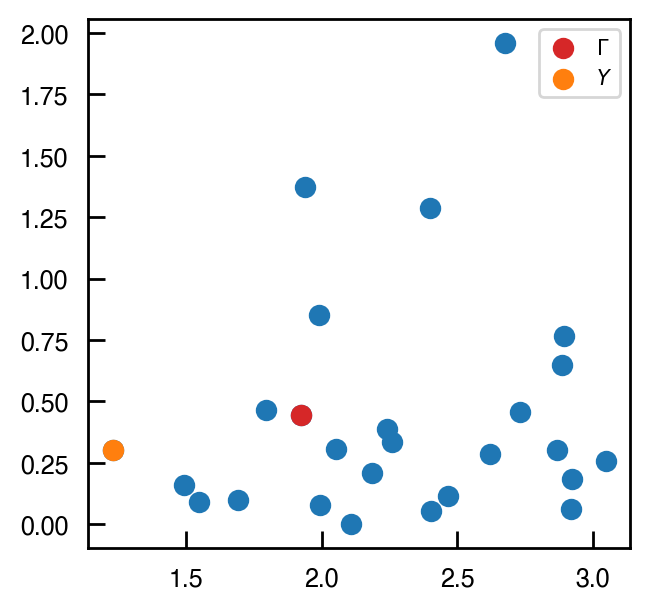

In [308]:
import numpy as np
import matplotlib.pyplot as plt

f,ax = plt.subplots(dpi=200)

tdm_sum = 0
energies = []
tdms = []
for i in range(cmc2_1_nonSOC_WAVEDER.nkpoints):
    weighted_tdm = np.sum(np.abs(np.array(cmc2_1_nonSOC_WAVECAR.TransitionDipoleMoment([1, i+1, 66], [1, i+1, 67])[-1])**2) * cmc2_1_nonSOC_EIGENVAL.kpoints_weights[i])
    energy = cmc2_1_nonSOC_WAVECAR.TransitionDipoleMoment([1, i+1, 66], [1, i+1, 67])[2]
    tdm_sum += weighted_tdm
    tdms += [weighted_tdm]
    energies += [energy]
    print(f"{weighted_tdm:.5f} \t Delta E: {energy:.2f} \t @ {cmc2_1_nonSOC_EIGENVAL.kpoints[i]}")
print(f"{tdm_sum:.2f}")

ax.scatter(energies, tdms, s=45, c="C0", marker="o")
ax.scatter(energies[0], tdms[0], s=45, c="C3", marker="o", label=r"$\Gamma$")
ax.scatter(energies[13-1], tdms[13-1], s=45, c="C1", marker="o", label=r"$Y$")
ax.legend()

What do ya know, validated once again.

Interesting, Cmc2_1 nonSOC gives zero TDM at Gamma

All transitions:

(0.0, 4.0)

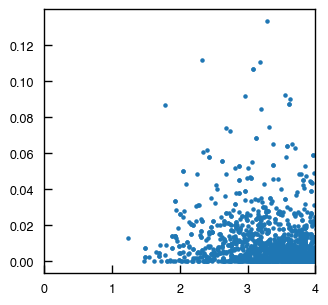

In [225]:
import numpy as np
import matplotlib.pyplot as plt
        
f, ax = plt.subplots(figsize=(3.5, 3.5), dpi=100)

energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmc2_1_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmc2_1_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmc2_1_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmc2_1_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

ax.scatter(energies, tdms, s=5, c="C0", marker="o")
ax.set_xlim(0, 4)

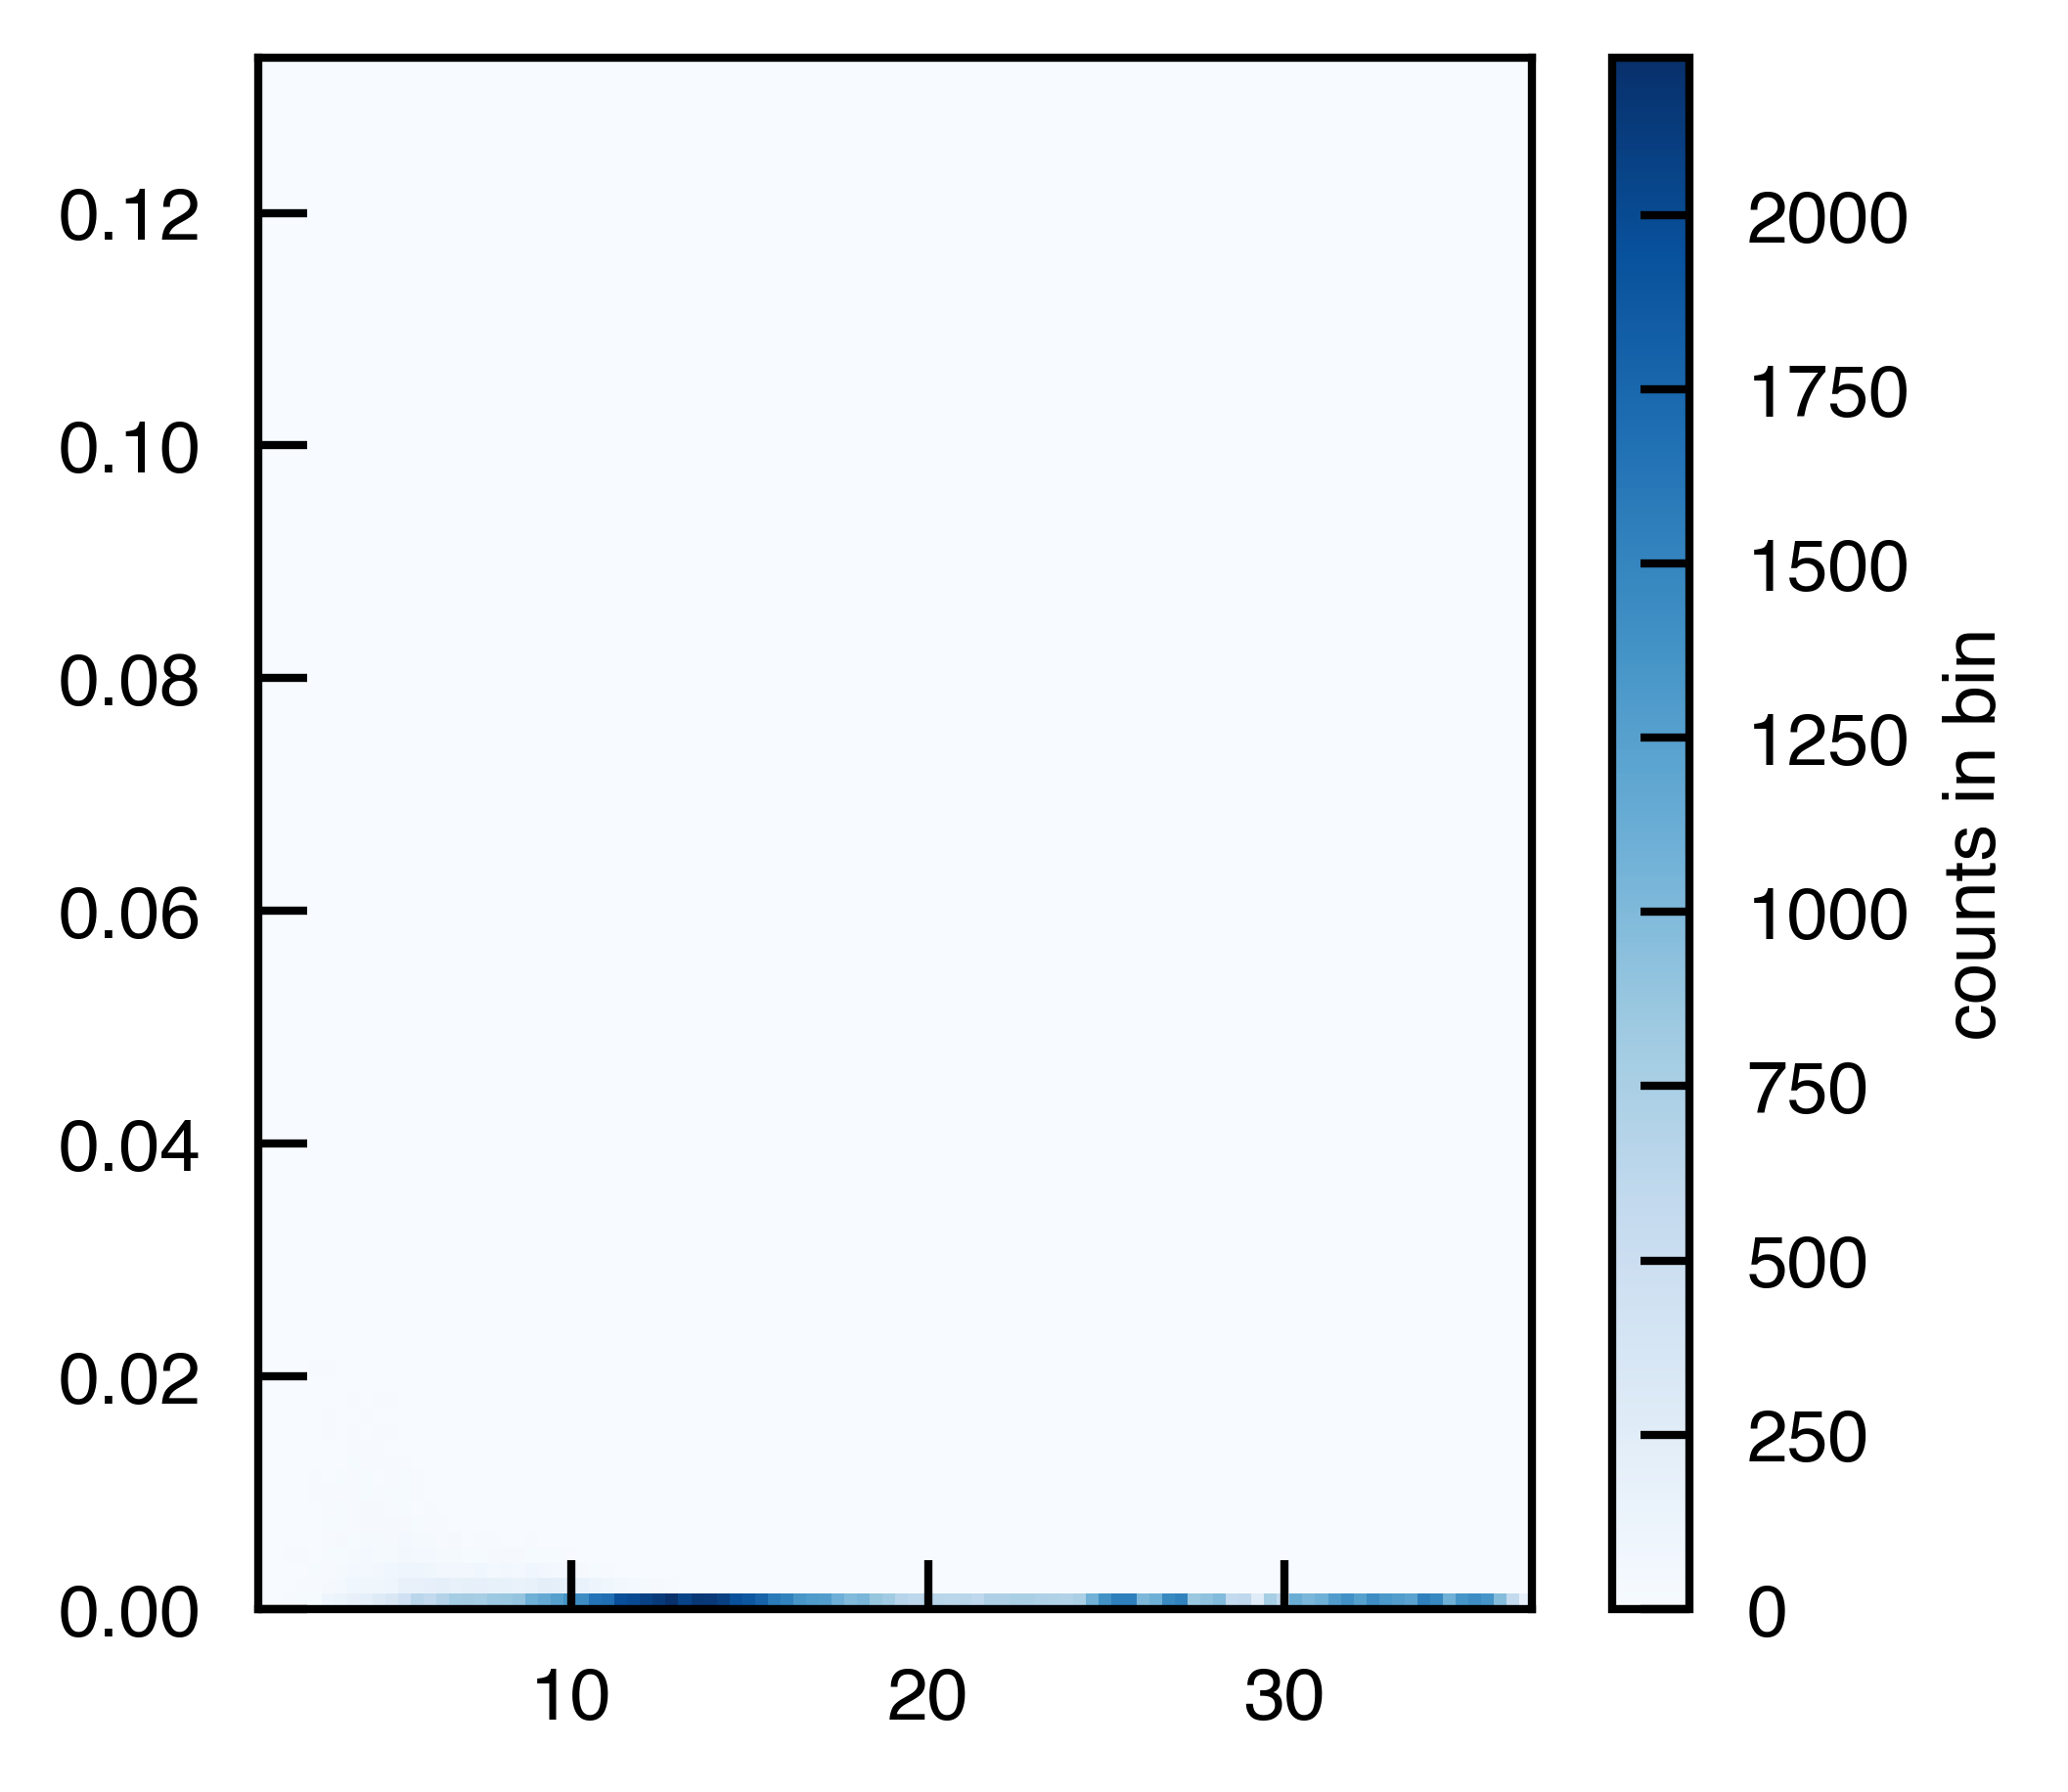

In [229]:
plt.hist2d(energies, tdms, bins=100, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

Average TDMs from 0 to 4 eV in steps of 0.1 eV

(0.0, 4.0)

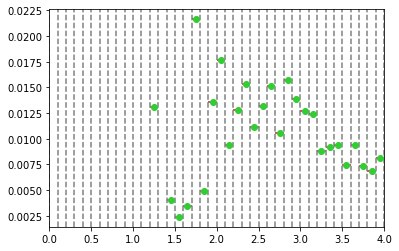

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
        
f, ax = plt.subplots()
        
energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmc2_1_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmc2_1_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmc2_1_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmc2_1_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

s, edges, _ = binned_statistic(energies, tdms, statistic='mean', bins=np.arange(0, 5.01, 0.1)) # binned from 0 to 5 eV in steps of 0.1 eV

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]
ax.hlines(s,edges[:-1],edges[1:], color="crimson", )

for e in edges:
    ax.axvline(e, color="grey", linestyle="--")

ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="limegreen", zorder=3)
ax.set_xlim(0, 4)

Summed:

(0.0, 4.0)

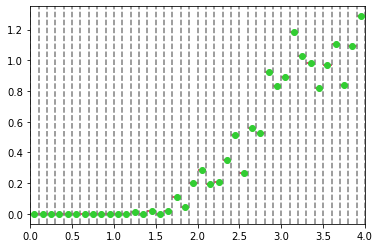

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
        
f, ax = plt.subplots()
        
energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmc2_1_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmc2_1_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmc2_1_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmc2_1_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

s, edges, _ = binned_statistic(energies, tdms, statistic='sum', bins=np.arange(0, 5.01, 0.1)) # binned from 0 to 5 eV in steps of 0.1 eV

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]
ax.hlines(s,edges[:-1],edges[1:], color="crimson", )

for e in edges:
    ax.axvline(e, color="grey", linestyle="--")

ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="limegreen", zorder=3)
ax.set_xlim(0, 4)

(0.0, 4.0)

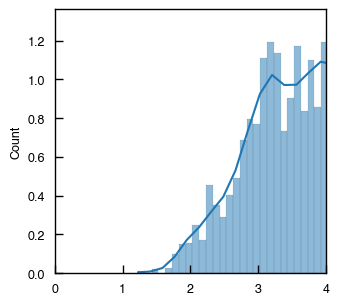

In [221]:
import numpy as np
import matplotlib.pyplot as plt
        
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(figsize=(3.5, 3.5), dpi=100)

energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmc2_1_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmc2_1_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmc2_1_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmc2_1_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

import seaborn as sns
sns.histplot(x=energies, weights=tdms, binwidth=0.1, ax=ax, kde=True, kde_kws={"bw_adjust":0.2})
#sns.kdeplot(x=energies, weights=tdms, fill=True, ax=ax)
ax.set_xlim(0, 4)

Times E^2 prefactor:

(0.0, 17.0)

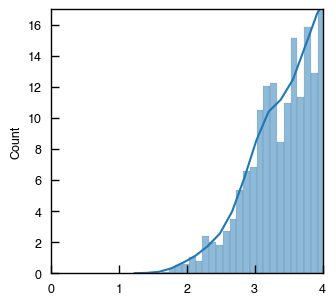

In [222]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(figsize=(3.5, 3.5), dpi=100)
        
energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmc2_1_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmc2_1_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmc2_1_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmc2_1_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

import seaborn as sns

sns.histplot(x=energies, weights=np.array(tdms)*(np.array(energies)**2), binwidth=0.1, ax=ax, kde=True, kde_kws={"bw_adjust":0.15})
#sns.kdeplot(x=energies, weights=tdms, fill=True, ax=ax)
ax.set_xlim(0, 4)
ax.set_ylim(0, 17)

From `Cmc2_1_nonSOC_LOPTICS` on `icYoung`:   
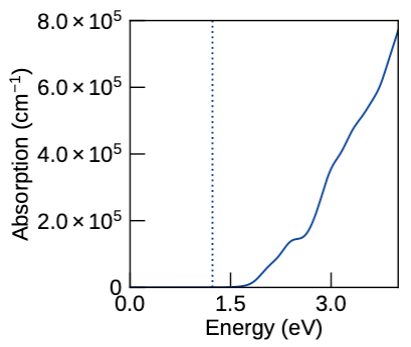

Alternatives:

Non-weighted:

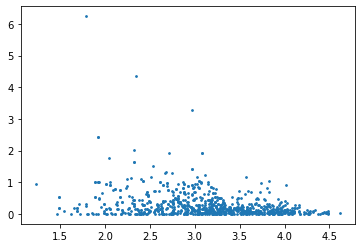

In [141]:
import numpy as np
import matplotlib.pyplot as plt
        
energies = []
tdms = []

for init in np.arange(60, 67):
    for final in np.arange(67, 72):
        tdm_sum = 0
        for i in range(cmc2_1_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmc2_1_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) #* cmc2_1_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

plt.scatter(energies, tdms, s=3, c="C0", marker="o")

(0.0, 4.0)

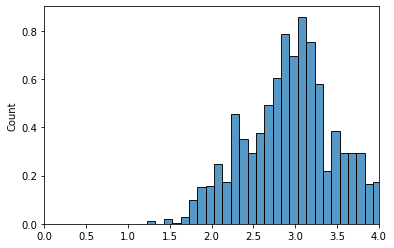

In [101]:
import numpy as np
import matplotlib.pyplot as plt
        
energies = []
tdms = []

for init in np.arange(60, 67):
    for final in np.arange(67, 72):
        tdm_sum = 0
        for i in range(cmc2_1_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmc2_1_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmc2_1_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

import seaborn as sns
sns.histplot(x=energies, weights=tdms, binwidth=0.1)
plt.xlim(0, 4)

(0.0, 4.0)

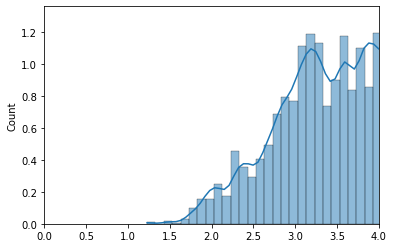

In [130]:
import numpy as np
import matplotlib.pyplot as plt
        
energies = []
tdms = []

for init in np.arange(40, 67):
    for final in np.arange(67, 90):
        tdm_sum = 0
        for i in range(cmc2_1_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmc2_1_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmc2_1_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmc2_1_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

import seaborn as sns
f, ax = plt.subplots()
sns.histplot(x=energies, weights=tdms, binwidth=0.1, ax=ax, kde=True, kde_kws={"bw_adjust":0.2})
#sns.kdeplot(x=energies, weights=tdms, fill=True, ax=ax)
ax.set_xlim(0, 4)

## $Cmcm$ NonSOC – Include some of this in SI to prove we weren't lying about formally-forbidden transition etc.

In [188]:
from pymatgen.io.vasp.outputs import Waveder, Eigenval

In [189]:
from pymatgen.electronic_structure.core import Spin

In [190]:
cmcm_nonSOC_WAVEDER = Waveder("/Users/kavanase/Desktop/Cmcm_nonSOC_WAVEDER")
cmcm_nonSOC_EIGENVAL = Eigenval("/Users/kavanase/Desktop/Cmcm_nonSOC_EIGENVAL")

In [191]:
cmcm_nonSOC_WAVEDER.cder_data.shape

(210, 132, 26, 1, 3)

In [76]:
cmcm_nonSOC_EIGENVAL.kpoints

[[0.0, 0.0, 0.0],
 [0.1666667, 2.133235e-17, 0.0],
 [0.3333333, 1.721326e-17, 0.0],
 [0.5, 6.535854e-17, 0.0],
 [0.1666667, 0.1666667, 0.0],
 [0.3333333, 0.1666667, 0.0],
 [0.5, 0.1666667, 0.0],
 [-0.3333333, 0.1666667, 0.0],
 [-0.1666667, 0.1666667, 0.0],
 [0.3333333, 0.3333333, 0.0],
 [0.5, 0.3333333, 0.0],
 [-0.3333333, 0.3333333, 0.0],
 [0.5, 0.5, 0.0],
 [0.0, 0.0, 0.5],
 [0.1666667, 2.133235e-17, 0.5],
 [0.3333333, 1.721326e-17, 0.5],
 [0.5, 6.535854e-17, 0.5],
 [0.1666667, 0.1666667, 0.5],
 [0.3333333, 0.1666667, 0.5],
 [0.5, 0.1666667, 0.5],
 [-0.3333333, 0.1666667, 0.5],
 [-0.1666667, 0.1666667, 0.5],
 [0.3333333, 0.3333333, 0.5],
 [0.5, 0.3333333, 0.5],
 [-0.3333333, 0.3333333, 0.5],
 [0.5, 0.5, 0.5]]

In [192]:
cmcm_nonSOC_WAVEDER.get_orbital_derivative_between_states(66-1, 67-1, 13-1, 0, 0)

(3.856873e-07+3.0567543e-07j)

Just between band 66 and 67:

0.05 	 Delta E: 1.72 	 @ [0.0, 0.0, 0.0]
0.00 	 Delta E: 1.63 	 @ [0.1666667, 2.133235e-17, 0.0]
0.06 	 Delta E: 2.07 	 @ [0.3333333, 1.721326e-17, 0.0]
0.00 	 Delta E: 2.51 	 @ [0.5, 6.535854e-17, 0.0]
0.03 	 Delta E: 1.95 	 @ [0.1666667, 0.1666667, 0.0]
0.05 	 Delta E: 2.49 	 @ [0.3333333, 0.1666667, 0.0]
0.12 	 Delta E: 2.41 	 @ [0.5, 0.1666667, 0.0]
0.00 	 Delta E: 1.72 	 @ [-0.3333333, 0.1666667, 0.0]
0.00 	 Delta E: 1.72 	 @ [-0.1666667, 0.1666667, 0.0]
0.00 	 Delta E: 2.68 	 @ [0.3333333, 0.3333333, 0.0]
0.00 	 Delta E: 2.02 	 @ [0.5, 0.3333333, 0.0]
0.00 	 Delta E: 1.39 	 @ [-0.3333333, 0.3333333, 0.0]
0.00 	 Delta E: 1.17 	 @ [0.5, 0.5, 0.0]
0.01 	 Delta E: 2.02 	 @ [0.0, 0.0, 0.5]
0.03 	 Delta E: 1.85 	 @ [0.1666667, 2.133235e-17, 0.5]
0.04 	 Delta E: 2.38 	 @ [0.3333333, 1.721326e-17, 0.5]
0.01 	 Delta E: 2.61 	 @ [0.5, 6.535854e-17, 0.5]
0.02 	 Delta E: 2.14 	 @ [0.1666667, 0.1666667, 0.5]
0.02 	 Delta E: 2.80 	 @ [0.3333333, 0.1666667, 0.5]
0.03 	 Delta E: 2.77 	 @ [0.5, 0

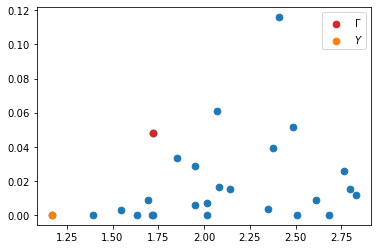

In [199]:
import numpy as np
import matplotlib.pyplot as plt

tdm_sum = 0
energies = []
tdms = []
for i in range(cmcm_nonSOC_WAVEDER.nkpoints):
    energy_diff = cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][67-1][0] - cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][66-1][0]
    energies += [energy_diff]
    kpoint_tdm = 0
    for cart in range(2):
        weighted_tdm = (np.abs(cmcm_nonSOC_WAVEDER.get_orbital_derivative_between_states(66-1, 67-1, i, 0, cart))**2) * cmcm_nonSOC_EIGENVAL.kpoints_weights[i]
        tdm_sum += weighted_tdm
        kpoint_tdm += weighted_tdm
    tdms += [kpoint_tdm]
    print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
print(f"{tdm_sum:.2f}")

plt.scatter(energies, tdms, s=45, c="C0", marker="o")
plt.scatter(energies[0], tdms[0], s=45, c="C3", marker="o", label=r"$\Gamma$")
plt.scatter(energies[13-1], tdms[13-1], s=45, c="C1", marker="o", label=r"$Y$")
plt.legend()

Yep zero at direct gap.

All transitions:

(0.0, 4.0)

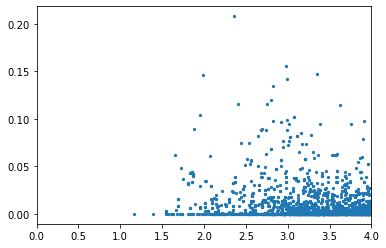

In [203]:
import numpy as np
import matplotlib.pyplot as plt
        
energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmcm_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmcm_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmcm_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmcm_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

plt.scatter(energies, tdms, s=5, c="C0", marker="o")
plt.xlim(0, 4)

Average TDMs from 0 to 4 eV in steps of 0.1 eV

(0.0, 4.0)

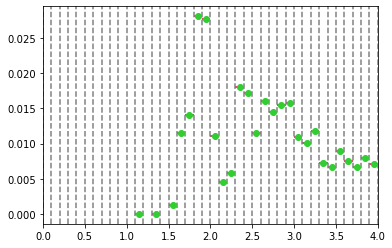

In [204]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
        
f, ax = plt.subplots()
        
energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmcm_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmcm_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmcm_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmcm_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

s, edges, _ = binned_statistic(energies, tdms, statistic='mean', bins=np.arange(0, 5.01, 0.1)) # binned from 0 to 5 eV in steps of 0.1 eV

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]
ax.hlines(s,edges[:-1],edges[1:], color="crimson", )

for e in edges:
    ax.axvline(e, color="grey", linestyle="--")

ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="limegreen", zorder=3)
ax.set_xlim(0, 4)

Summed:

(0.0, 4.0)

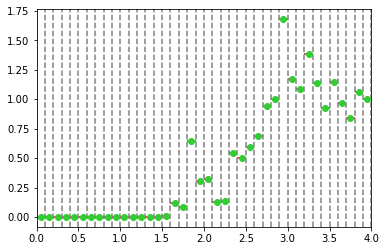

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic
        
f, ax = plt.subplots()
        
energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmcm_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmcm_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmcm_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmcm_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

s, edges, _ = binned_statistic(energies, tdms, statistic='sum', bins=np.arange(0, 5.01, 0.1)) # binned from 0 to 5 eV in steps of 0.1 eV

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]
ax.hlines(s,edges[:-1],edges[1:], color="crimson", )

for e in edges:
    ax.axvline(e, color="grey", linestyle="--")

ax.scatter(edges[:-1]+np.diff(edges)/2, s, c="limegreen", zorder=3)
ax.set_xlim(0, 4)

(0.0, 4.0)

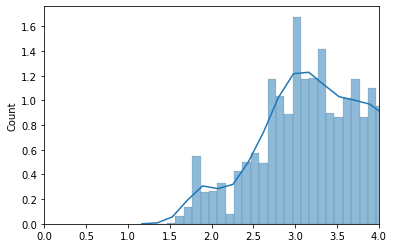

In [206]:
import numpy as np
import matplotlib.pyplot as plt
        
energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmcm_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmcm_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmcm_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmcm_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

import seaborn as sns
f, ax = plt.subplots()
sns.histplot(x=energies, weights=tdms, binwidth=0.1, ax=ax, kde=True, kde_kws={"bw_adjust":0.2})
#sns.kdeplot(x=energies, weights=tdms, fill=True, ax=ax)
ax.set_xlim(0, 4)

(0.0, 17.0)

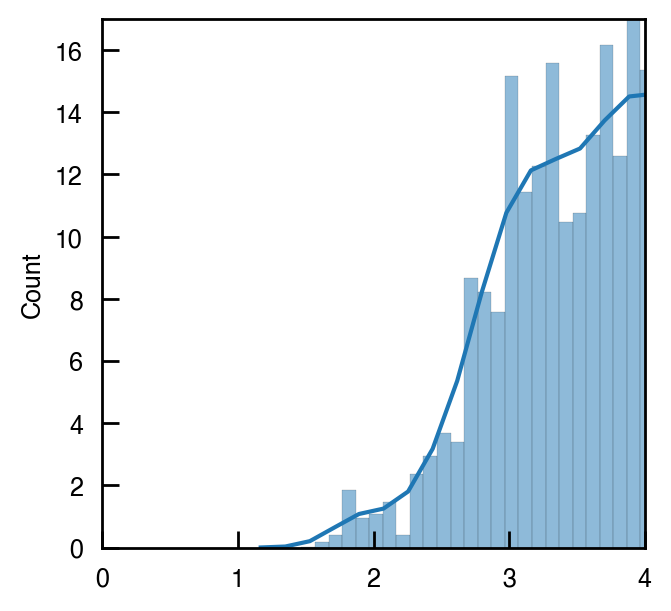

In [217]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("../Packages/publication_style.mplstyle")
        
energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmcm_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmcm_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(2):
                weighted_tdm = (np.abs(cmcm_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmcm_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
            #print(f"{kpoint_tdm:.2f} \t Delta E: {energy_diff:.2f} \t @ {cmcm_nonSOC_EIGENVAL.kpoints[i]}")
       # print(f"{tdm_sum:.2f}")

import seaborn as sns
f, ax = plt.subplots(figsize=(3.5, 3.5), dpi=200)
sns.histplot(x=energies, weights=np.array(tdms)*(np.array(energies)**2), binwidth=0.1, ax=ax, kde=True, kde_kws={"bw_adjust":0.15})
#sns.kdeplot(x=energies, weights=tdms, fill=True, ax=ax)
ax.set_xlim(0, 4)
ax.set_ylim(0, 17)

```bash
icYoung: Cmcm_nonSOC_LOPTICS > sumo-optplot --ymax 1e6 --xmin 0 --xmax 4 -g 0.05 -b 1.17
icYoung: Cmcm_nonSOC_LOPTICS > imgcat absorption.pdf
```
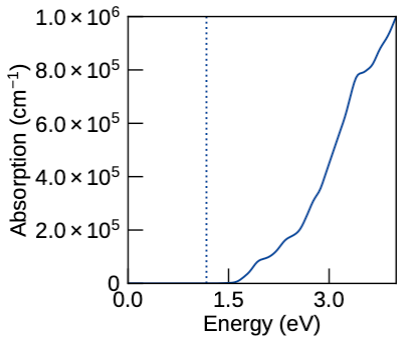

Show this in the SI (Cmcm nonSOC HSE06 optics, with direct gap at Y (1.17 eV) shown).

So this is basically the absorption plot right? Cause we're including DOS and oscillator strength here. Something like the scatter plots are a nice way to show both effects independently at once. Try plot with histograms of height given by average oscillator strength at that energy interval? (Nice way to demo)

- Unknown prefactor so just do this all as normalised TDM

2x2 plots of scatter, average transition probability, JDOS and then optical absorption?

In [519]:
energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmcm_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmcm_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(3):
                weighted_tdm = (np.abs(cmcm_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmcm_nonSOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]

In [520]:
cmcm_nonsoc_energies = energies
cmcm_nonsoc_weighted_tdms = tdms

np.save("cmcm_nonsoc_energies.npy", cmcm_nonsoc_energies)
np.save("cmcm_nonsoc_weighted_tdms.npy", cmcm_nonsoc_weighted_tdms)

cmcm_nonsoc_energies = np.load("cmcm_nonsoc_energies.npy")
cmcm_nonsoc_weighted_tdms = np.load("cmcm_nonsoc_weighted_tdms.npy")

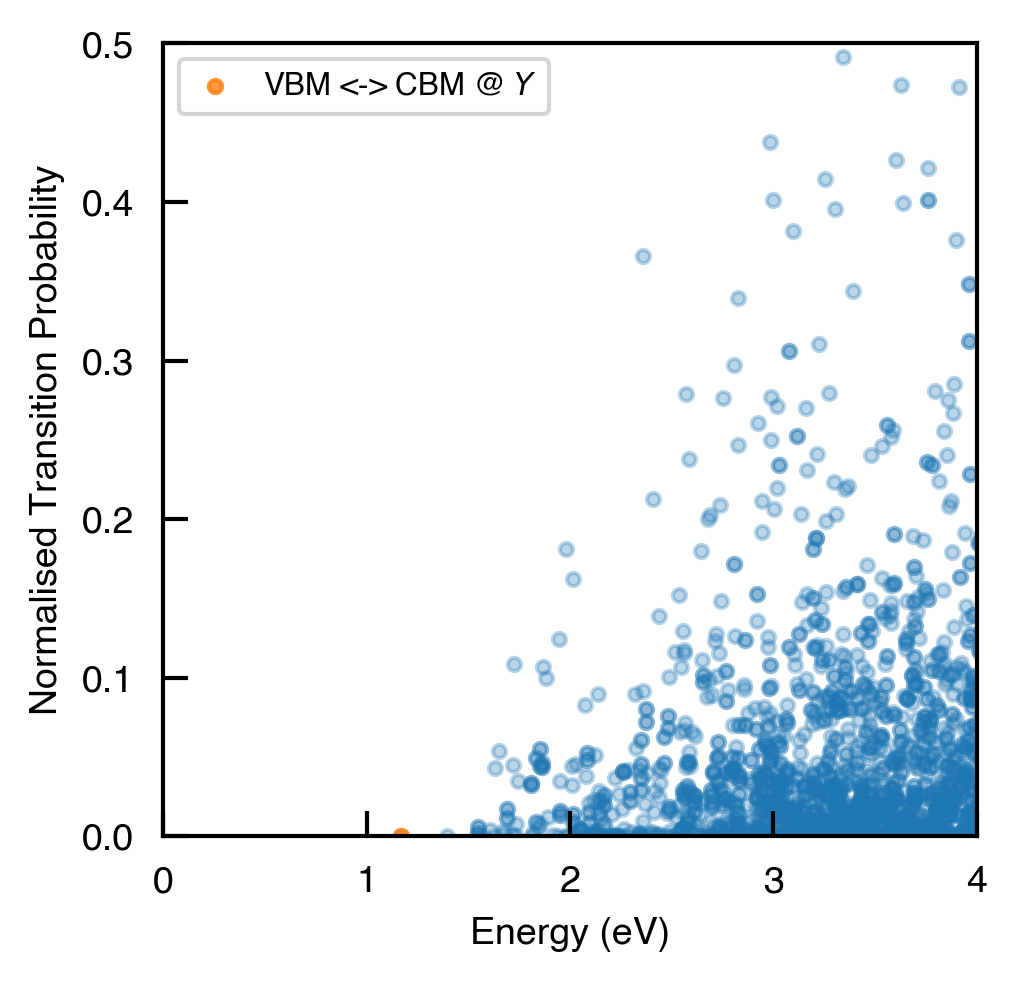

In [525]:
import numpy as np
import matplotlib.pyplot as plt
        
f, ax = plt.subplots(figsize=(3.5, 3.5), dpi=300)

maximum = np.max(cmcm_nonsoc_weighted_tdms[cmcm_nonsoc_energies<4]*((cmcm_nonsoc_energies[cmcm_nonsoc_energies<4])**2))
ax.scatter(cmcm_nonsoc_energies, (cmcm_nonsoc_weighted_tdms / maximum)*cmcm_nonsoc_energies**2, s=10, color="C0", edgecolors="C0", alpha=0.3)
ax.scatter(cmcm_nonsoc_energies[cmcm_nonsoc_energies==np.min(cmcm_nonsoc_energies)], (cmcm_nonsoc_weighted_tdms[cmcm_nonsoc_energies==np.min(cmcm_nonsoc_energies)]  / maximum)*cmcm_nonsoc_energies[cmcm_nonsoc_energies==np.min(cmcm_nonsoc_energies)]**2, 
           s=10, color="C1", label="VBM <-> CBM @ $Y$", edgecolors="C1", alpha=0.8)
ax.set_xlim(0, 4)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised Transition Probability") # Normalised TDM times E^2 prefactor per availabel transition. Binned sum of this gives the optical absorptioin
ax.set_ylim(0, 0.5)
ax.legend(loc="upper left")

Non-weighted:

In [526]:
energies = []
tdms = []

for init in np.arange(1, 67):
    for final in np.arange(67, cmcm_nonSOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmcm_nonSOC_WAVEDER.nkpoints):
            energy_diff = cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmcm_nonSOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(3):
                nonweighted_tdm = (np.abs(cmcm_nonSOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2)
                kpoint_tdm += nonweighted_tdm
            tdms += [kpoint_tdm]

In [527]:
cmcm_nonsoc_nonweighted_tdms = tdms
np.save("cmcm_nonsoc_nonweighted_tdms.npy", cmcm_nonsoc_nonweighted_tdms)
cmcm_nonsoc_nonweighted_tdms = np.load("cmcm_nonsoc_nonweighted_tdms.npy")

In [447]:
cmcm_nonSOC_EIGENVAL.kpoints_weights

[0.01388889,
 0.05555556,
 0.05555556,
 0.02777778,
 0.02777778,
 0.05555556,
 0.05555556,
 0.05555556,
 0.02777778,
 0.02777778,
 0.05555556,
 0.02777778,
 0.01388889,
 0.01388889,
 0.05555556,
 0.05555556,
 0.02777778,
 0.02777778,
 0.05555556,
 0.05555556,
 0.05555556,
 0.02777778,
 0.02777778,
 0.05555556,
 0.02777778,
 0.01388889]

Yeah should use non-weighted here

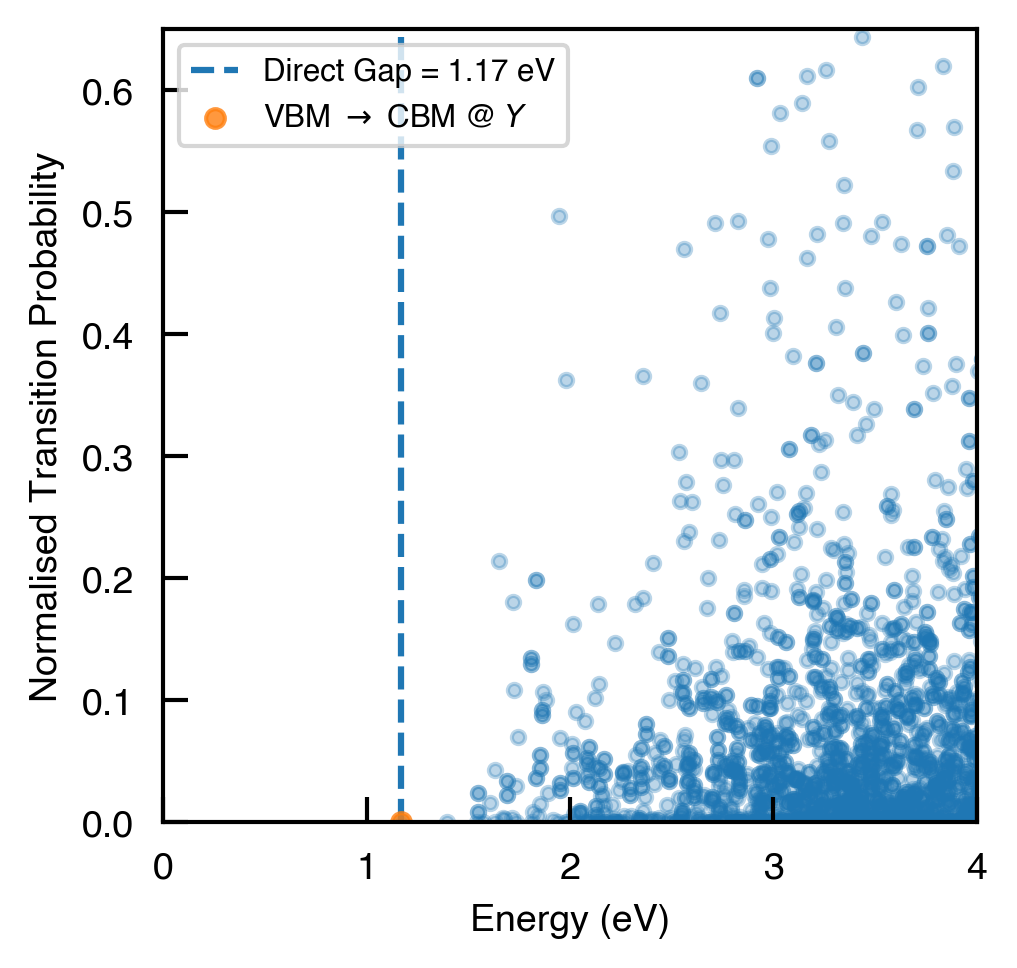

In [544]:
import numpy as np
import matplotlib.pyplot as plt
        
f, ax = plt.subplots(figsize=(3.5, 3.5), dpi=300)

ax.vlines(1.17, 0, 1, linestyles="dashed", label="Direct Gap = 1.17 eV", zorder=0)
maximum = np.max(np.array(cmcm_nonsoc_nonweighted_tdms)[cmcm_nonsoc_energies<4]*((cmcm_nonsoc_energies[cmcm_nonsoc_energies<4])**2))
ax.scatter(cmcm_nonsoc_energies, (np.array(cmcm_nonsoc_nonweighted_tdms) / maximum)*cmcm_nonsoc_energies**2, s=10, color="C0", edgecolors="C0", alpha=0.3)
ax.scatter(cmcm_nonsoc_energies[cmcm_nonsoc_energies==np.min(cmcm_nonsoc_energies)], (np.array(cmcm_nonsoc_nonweighted_tdms)[cmcm_nonsoc_energies==np.min(cmcm_nonsoc_energies)]  / maximum)*cmcm_nonsoc_energies[cmcm_nonsoc_energies==np.min(cmcm_nonsoc_energies)]**2, 
           s=20, color="C1", label=r"VBM $\rightarrow$ CBM @ $Y$", edgecolors="C1", alpha=0.8)
ax.set_xlim(0, 4)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised Transition Probability") # Normalised TDM times E^2 prefactor per availabel transition. Binned sum of this gives the optical absorptioin
ax.set_ylim(0, 0.65)
ax.legend(loc="upper left")
f.savefig("BS_DOSs/Cmcm_nonSOC_Transition_Probability_Scatter.pdf", bbox_inches="tight")

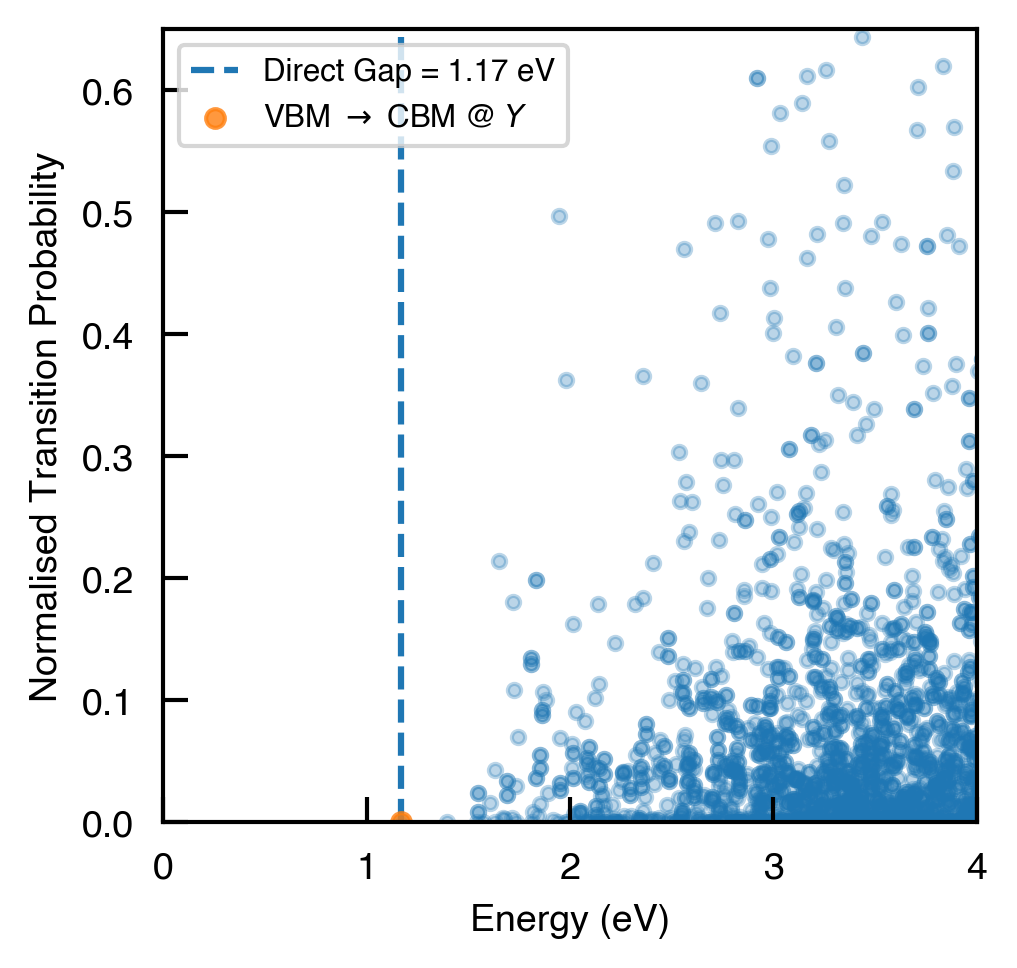

In [545]:
import numpy as np
import matplotlib.pyplot as plt
        
f, ax = plt.subplots(figsize=(3.5, 3.5), dpi=300)

ax.vlines(1.17, 0, 1, linestyles="dashed", label="Direct Gap = 1.17 eV", zorder=0)
maximum = np.max(np.array(cmcm_nonsoc_nonweighted_tdms)[cmcm_nonsoc_energies<4]*((cmcm_nonsoc_energies[cmcm_nonsoc_energies<4])**2))
ax.scatter(cmcm_nonsoc_energies, (np.array(cmcm_nonsoc_nonweighted_tdms) / maximum)*cmcm_nonsoc_energies**2, s=10, color="C0", edgecolors="C0", alpha=0.3)
ax.scatter(cmcm_nonsoc_energies[cmcm_nonsoc_energies==np.min(cmcm_nonsoc_energies)], (np.array(cmcm_nonsoc_nonweighted_tdms)[cmcm_nonsoc_energies==np.min(cmcm_nonsoc_energies)]  / maximum)*cmcm_nonsoc_energies[cmcm_nonsoc_energies==np.min(cmcm_nonsoc_energies)]**2, 
           s=20, color="C1", label=r"VBM $\rightarrow$ CBM @ $Y$", edgecolors="C1", alpha=0.8)
ax.set_xlim(0, 4)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised Transition Probability") # Normalised TDM times E^2 prefactor per availabel transition. Binned sum of this gives the optical absorptioin
ax.set_ylim(0, 0.65)
ax.legend(loc="upper left")
f.savefig("BS_DOSs/Cmcm_nonSOC_Transition_Probability_Scatter.png", bbox_inches="tight", dpi=600)

Average transition probability at given energy:

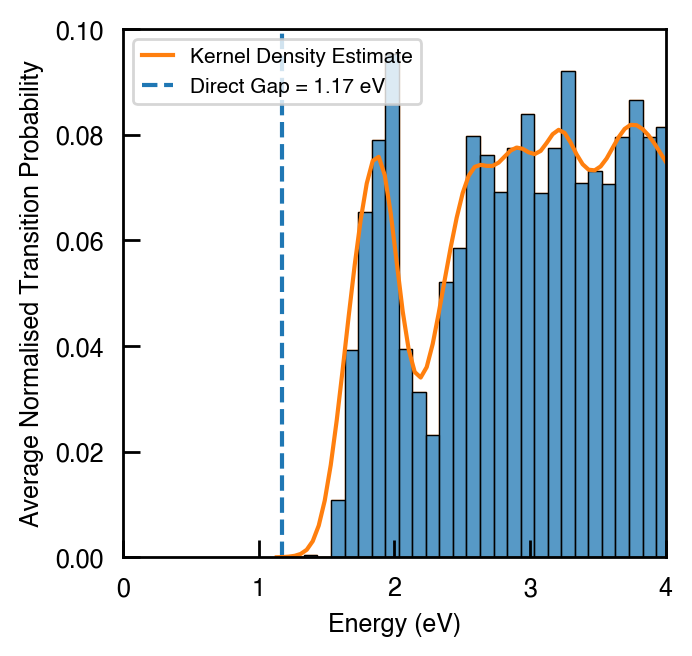

In [567]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(dpi=200)

ax.vlines(1.17, 0, 1, linestyles="dashed", label="Direct Gap = 1.17 eV", zorder=0)
maximum = np.max(np.array(cmcm_nonsoc_nonweighted_tdms)[cmcm_nonsoc_energies<4]*((cmcm_nonsoc_energies[cmcm_nonsoc_energies<4])**2))

s, edges, _ = binned_statistic(cmcm_nonsoc_energies, ((np.array(cmcm_nonsoc_nonweighted_tdms))*cmcm_nonsoc_energies**2)/maximum, statistic='mean',
                               bins=np.arange(0, 10.01, 0.1)) # binned from 0 to 5 eV in steps of 0.1 eV

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]

ax.set_xlim(0, 4)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Average Normalised Transition Probability") # Normalised TDM times E^2 prefactor per availabel transition. Binned sum of this gives the optical absorptioin
ax.set_ylim(0, 0.1)
sns.histplot(x=edges[:-1]+np.diff(edges)/3, weights=s, ax=ax, binwidth=0.1-0.0001, kde=True, kde_kws={"bw_adjust":0.1}, line_kws={"color":"C2"}, color="C1", fill=False)
sns.histplot(x=edges[:-1]+np.diff(edges)/3, weights=s, ax=ax, binwidth=0.1-0.0001, color="C0")
ax.plot(100, 100, c="C1", label="Kernel Density Estimate")
ax.legend()
f.savefig("BS_DOSs/Cmcm_nonSOC_Avg_Transition_Probability_Histogram.pdf", bbox_inches="tight")

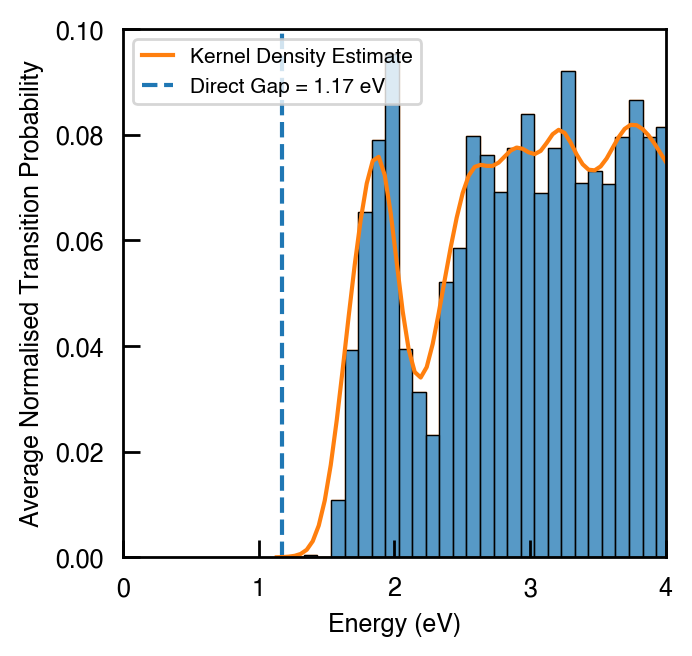

In [568]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(dpi=200)

ax.vlines(1.17, 0, 1, linestyles="dashed", label="Direct Gap = 1.17 eV", zorder=0)
maximum = np.max(np.array(cmcm_nonsoc_nonweighted_tdms)[cmcm_nonsoc_energies<4]*((cmcm_nonsoc_energies[cmcm_nonsoc_energies<4])**2))

s, edges, _ = binned_statistic(cmcm_nonsoc_energies, ((np.array(cmcm_nonsoc_nonweighted_tdms))*cmcm_nonsoc_energies**2)/maximum, statistic='mean',
                               bins=np.arange(0, 10.01, 0.1)) # binned from 0 to 5 eV in steps of 0.1 eV

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]

ax.set_xlim(0, 4)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Average Normalised Transition Probability") # Normalised TDM times E^2 prefactor per availabel transition. Binned sum of this gives the optical absorptioin
ax.set_ylim(0, 0.1)
sns.histplot(x=edges[:-1]+np.diff(edges)/3, weights=s, ax=ax, binwidth=0.1-0.0001, kde=True, kde_kws={"bw_adjust":0.1}, line_kws={"color":"C2"}, color="C1", fill=False)
sns.histplot(x=edges[:-1]+np.diff(edges)/3, weights=s, ax=ax, binwidth=0.1-0.0001, color="C0")
ax.plot(100, 100, c="C1", label="Kernel Density Estimate")
ax.legend()
f.savefig("BS_DOSs/Cmcm_nonSOC_Avg_Transition_Probability_Histogram.png", bbox_inches="tight", dpi=600)

In [548]:
import matplotlib.pyplot as plt

import numpy as np

jdos = np.loadtxt("BS_DOSs/Cmcm_nonSOC_JDOS.dat")
absorp = np.loadtxt("BS_DOSs/Cmcm_nonSOC_Absorption_g0.1.dat")

energies = jdos.transpose()[0]
jdos_dos = jdos.transpose()[1]

energies_abs = absorp.transpose()[0]
alpha = absorp.transpose()[1]

In [549]:
abs_sum = np.trapz(alpha[energies_abs <= 4], energies_abs[energies_abs <= 4])
jdos_sum = np.trapz(jdos_dos[energies <= 4], energies[energies <= 4])

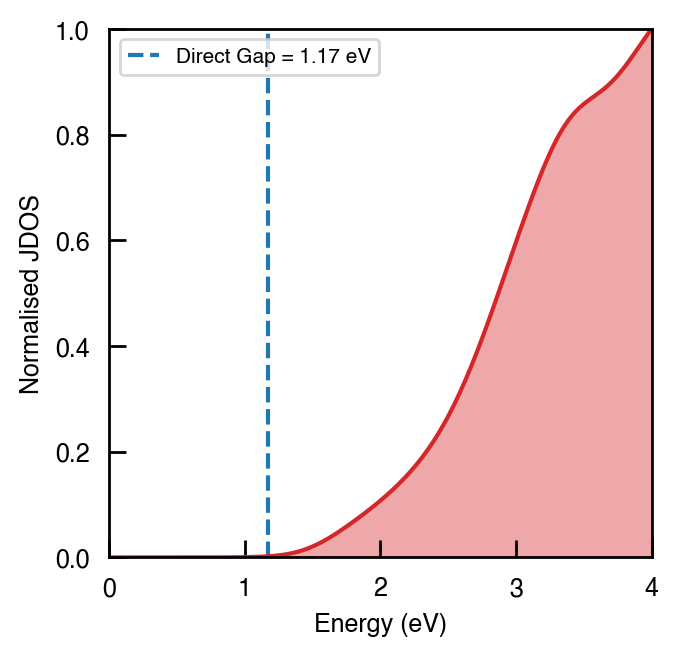

In [551]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,1, figsize=(3.5,3.5), dpi=200)
ax.plot(energies, 
        jdos_dos/jdos_dos[energies == find_nearest(energies, 4)], color="C3")
ax.fill_between(energies, 0,
        jdos_dos/jdos_dos[energies == find_nearest(energies, 4)], alpha=0.4, color="C3")
ax.set_xlim(0, 4)
ax.set_ylim(0, 1)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised JDOS")
ax.vlines(1.17, 0, 1, linestyles="dashed", label="Direct Gap = 1.17 eV", zorder=0)
ax.legend()
#ax.set_yticklabels([])
f.savefig("BS_DOSs/Cmcm_nonSOC_JDOS.pdf", bbox_inches="tight", dpi=600)

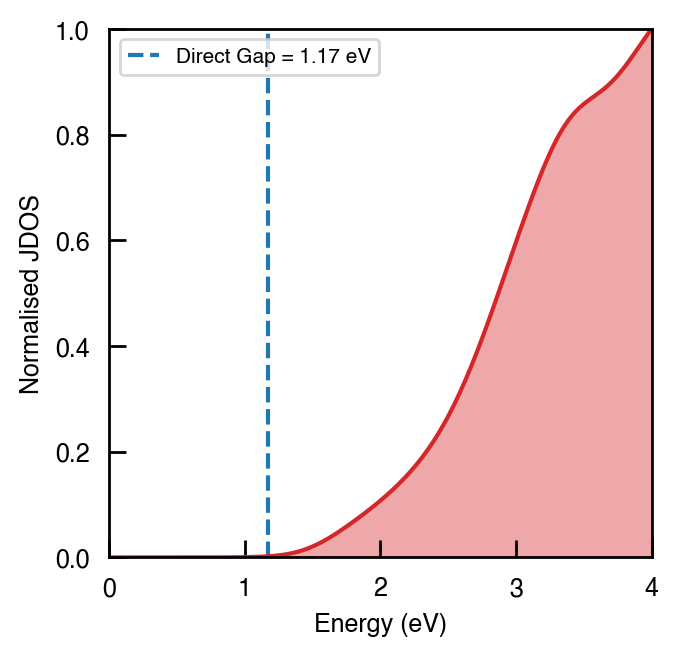

In [552]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,1, figsize=(3.5,3.5), dpi=200)
ax.plot(energies, 
        jdos_dos/jdos_dos[energies == find_nearest(energies, 4)], color="C3")
ax.fill_between(energies, 0,
        jdos_dos/jdos_dos[energies == find_nearest(energies, 4)], alpha=0.4, color="C3")
ax.set_xlim(0, 4)
ax.set_ylim(0, 1)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised JDOS")
ax.vlines(1.17, 0, 1, linestyles="dashed", label="Direct Gap = 1.17 eV", zorder=0)
ax.legend()
#ax.set_yticklabels([])
f.savefig("BS_DOSs/Cmcm_nonSOC_JDOS.png", bbox_inches="tight", dpi=600)

Blue + Red = Purple

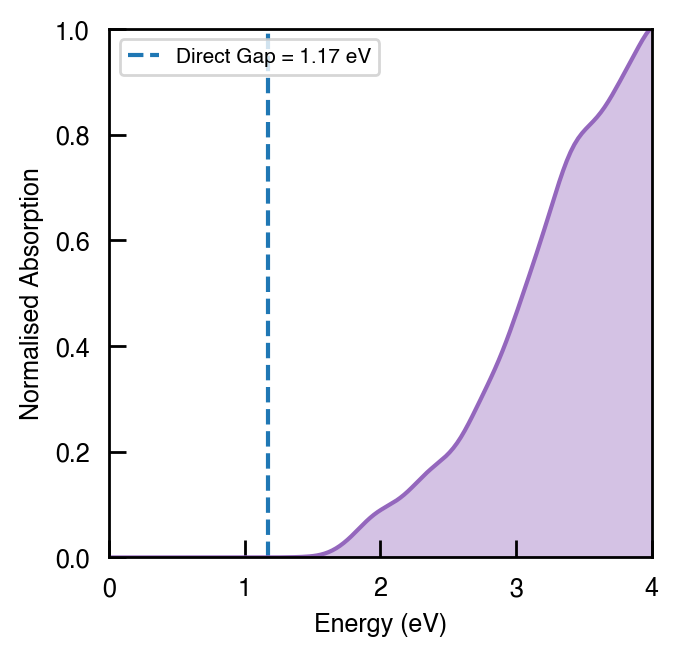

In [553]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,1, figsize=(3.5,3.5), dpi=200)
ax.plot(energies_abs, 
        alpha/alpha[energies_abs == find_nearest(energies_abs, 4)], color="C4")
ax.fill_between(energies_abs, 0,
        alpha/alpha[energies_abs == find_nearest(energies_abs, 4)], alpha=0.4, color="C4")
ax.set_xlim(0, 4)
ax.set_ylim(0, 1)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised Absorption")
ax.vlines(1.17, 0, 1, linestyles="dashed", label="Direct Gap = 1.17 eV", zorder=0)
ax.legend()
#ax.set_yticklabels([])
f.savefig("BS_DOSs/Cmcm_nonSOC_Normalised_Absorption.pdf", bbox_inches="tight", dpi=600)

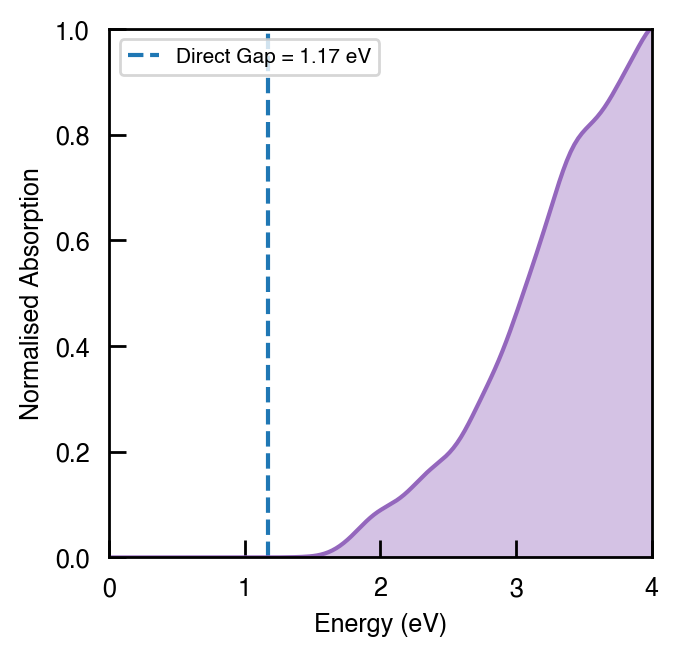

In [554]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,1, figsize=(3.5,3.5), dpi=200)
ax.plot(energies_abs, 
        alpha/alpha[energies_abs == find_nearest(energies_abs, 4)], color="C4")
ax.fill_between(energies_abs, 0,
        alpha/alpha[energies_abs == find_nearest(energies_abs, 4)], alpha=0.4, color="C4")
ax.set_xlim(0, 4)
ax.set_ylim(0, 1)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised Absorption")
ax.vlines(1.17, 0, 1, linestyles="dashed", label="Direct Gap = 1.17 eV", zorder=0)
ax.legend()
#ax.set_yticklabels([])
f.savefig("BS_DOSs/Cmcm_nonSOC_Normalised_Absorption.png", bbox_inches="tight", dpi=600)

# $Cmc2_1$ SOC

In [230]:
cmc2_1_SOC_EIGENVAL = Eigenval("./Cmc2_1_SOC_EIGENVAL")
cmc2_1_SOC_WAVEDER = Waveder("./Cmc2_1_SOC_WAVEDER")

In [234]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100 # keep figures relatively small in the notebook

In [502]:
energy = np.min(cmc2_1_soc_energies) 

In [510]:
energies = []
tdms = []

for init in np.arange(1, 133):
    for final in np.arange(133, cmc2_1_SOC_WAVEDER.nelect):
        tdm_sum = 0
        for i in range(cmc2_1_SOC_WAVEDER.nkpoints):
            energy_diff = cmc2_1_SOC_EIGENVAL.eigenvalues[Spin.up][i][final-1][0] - cmc2_1_SOC_EIGENVAL.eigenvalues[Spin.up][i][init-1][0]
            energies += [energy_diff]
            kpoint_tdm = 0
            for cart in range(3):
                weighted_tdm = (np.abs(cmc2_1_SOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmc2_1_SOC_EIGENVAL.kpoints_weights[i]
                tdm_sum += weighted_tdm
                kpoint_tdm += weighted_tdm
            tdms += [kpoint_tdm]
cmc2_1_soc_weighted_tdms = np.array(tdms)
cmc2_1_soc_energies = np.array(energies)

In [511]:
np.save("cmc2_1_soc_energies.npy", cmc2_1_soc_energies)
np.save("cmc2_1_soc_weighted_tdms.npy", cmc2_1_soc_weighted_tdms)

In [532]:
for init in np.arange(128, 133):
    for final in np.arange(133, 135):
        print(init, final)
        for cart in range(3):
            weighted_tdm = (np.abs(cmc2_1_SOC_WAVEDER.get_orbital_derivative_between_states(init-1, final-1, i, 0, cart))**2) * cmc2_1_SOC_EIGENVAL.kpoints_weights[i]
            print(weighted_tdm)

128 133
3.586677767769405e-05
4.4977370268093895e-05
2.5210472861897535e-06
128 134
0.0015224798145042644
0.005529196023211011
1.6726948441747396e-05
129 133
0.003563493905807987
0.009907115324226516
0.0003123466487749034
129 134
0.002592979619513389
0.009341872493456688
0.004626504535749498
130 133
0.0009858506310029046
0.003170146151674198
0.004783836676895131
130 134
0.00099424626023735
0.004060639901778982
0.00028365080076071754
131 133
5.218306349277319e-06
0.0006760582763907952
0.007988052945082211
131 134
3.2713002925190895e-05
0.0011969072500409015
0.001380079734139136
132 133
3.498535045996507e-05
0.002037360240257763
0.004291004395588906
132 134
0.00022288356179622366
0.0007858928616296912
0.0053535664538489755


In [555]:
cmc2_1_soc_energies = np.load("cmc2_1_soc_energies.npy")
cmc2_1_soc_weighted_tdms = np.load("cmc2_1_soc_weighted_tdms.npy")

In [512]:
cmc2_1_SOC_WAVEDER.nkpoints

72

In [513]:
np.array(cmc2_1_SOC_EIGENVAL.kpoints_weights) == cmc2_1_SOC_EIGENVAL.kpoints_weights[1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

All the same weight, so weighted TDM is same as non-weighted here, sick

In [505]:
cmc2_1_soc_weighted_tdms[cmc2_1_soc_energies==energy]

array([0.01107925, 0.00029451])

Will have to note now points between Y and next transition, due to low degeneracy in k-space / low effective masses near band extrema, but that this doesn't affect results as convergence of the absorption behaviour wrt kpoint sampling was carefully checked, and so the transition probability in this range will follow the general trend from gap onwards

2x2 plots of scatter, average transition probability, JDOS and then optical absorption?

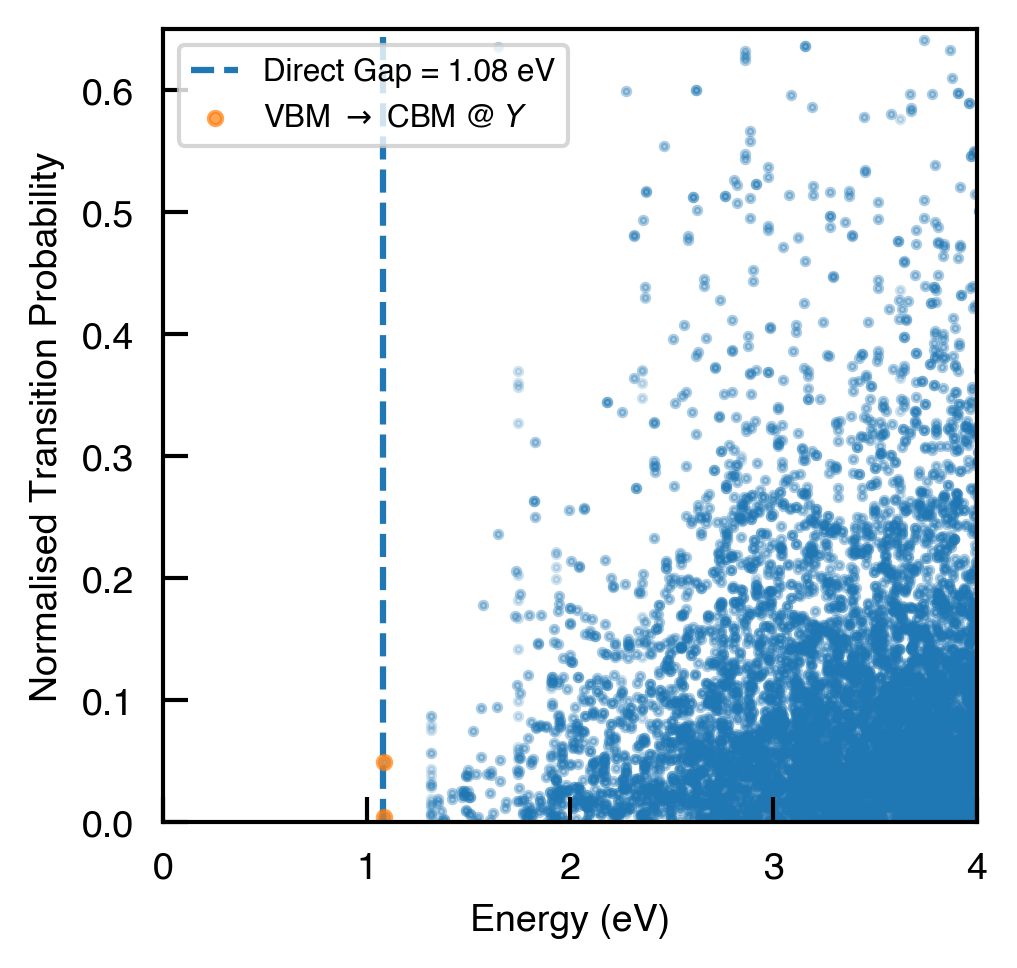

In [560]:
import numpy as np
import matplotlib.pyplot as plt
        
f, ax = plt.subplots(figsize=(3.5, 3.5), dpi=300)

ax.vlines(1.08, 0, 1, linestyles="dashed", label="Direct Gap = 1.08 eV", zorder=0)
maximum = np.max(cmc2_1_soc_weighted_tdms[cmc2_1_soc_energies<4]*((cmc2_1_soc_energies[cmc2_1_soc_energies<4])**2))
ax.scatter(cmc2_1_soc_energies, (cmc2_1_soc_weighted_tdms / maximum)*cmc2_1_soc_energies**2, s=3, color="C0", edgecolors="C0", alpha=0.2)
ax.scatter(cmc2_1_soc_energies[cmc2_1_soc_energies==np.min(cmc2_1_soc_energies)], (cmc2_1_soc_weighted_tdms[cmc2_1_soc_energies==np.min(cmc2_1_soc_energies)]  / maximum)*cmc2_1_soc_energies[cmc2_1_soc_energies==np.min(cmc2_1_soc_energies)]**2, 
           s=10, color="C1", label=r"VBM $\rightarrow$ CBM @ $Y$", edgecolors="C1", alpha=0.7)
ax.set_xlim(0, 4)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised Transition Probability") # Normalised TDM times E^2 prefactor per availabel transition. Binned sum of this gives the optical absorptioin
ax.set_ylim(0, 0.65)
ax.legend(loc="upper left")
f.savefig("BS_DOSs/Cmc2_1_SOC_Transition_Probability_Scatter.pdf", bbox_inches="tight", dpi=600)

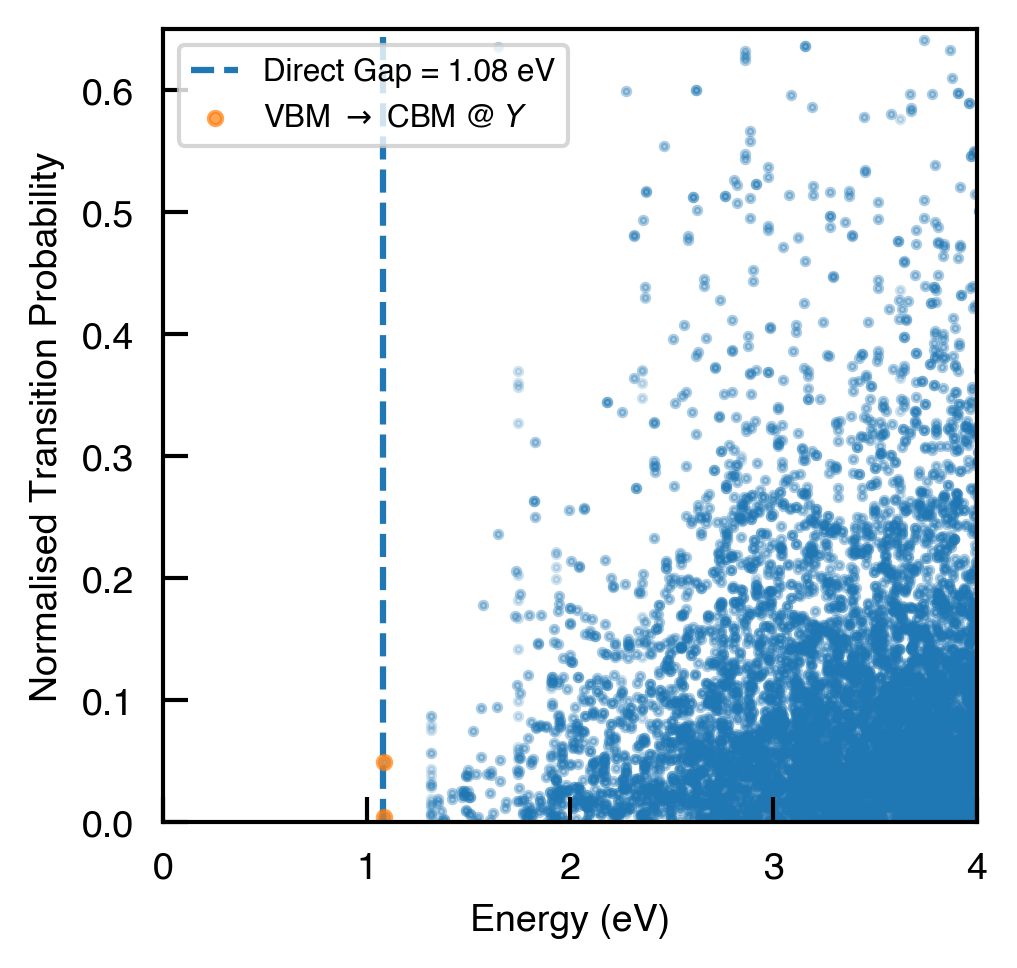

In [561]:
import numpy as np
import matplotlib.pyplot as plt
        
f, ax = plt.subplots(figsize=(3.5, 3.5), dpi=300)

ax.vlines(1.08, 0, 1, linestyles="dashed", label="Direct Gap = 1.08 eV", zorder=0)
maximum = np.max(cmc2_1_soc_weighted_tdms[cmc2_1_soc_energies<4]*((cmc2_1_soc_energies[cmc2_1_soc_energies<4])**2))
ax.scatter(cmc2_1_soc_energies, (cmc2_1_soc_weighted_tdms / maximum)*cmc2_1_soc_energies**2, s=3, color="C0", edgecolors="C0", alpha=0.2)
ax.scatter(cmc2_1_soc_energies[cmc2_1_soc_energies==np.min(cmc2_1_soc_energies)], (cmc2_1_soc_weighted_tdms[cmc2_1_soc_energies==np.min(cmc2_1_soc_energies)]  / maximum)*cmc2_1_soc_energies[cmc2_1_soc_energies==np.min(cmc2_1_soc_energies)]**2, 
           s=10, color="C1", label=r"VBM $\rightarrow$ CBM @ $Y$", edgecolors="C1", alpha=0.7)
ax.set_xlim(0, 4)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised Transition Probability") # Normalised TDM times E^2 prefactor per availabel transition. Binned sum of this gives the optical absorptioin
ax.set_ylim(0, 0.65)
ax.legend(loc="upper left")
f.savefig("BS_DOSs/Cmc2_1_SOC_Transition_Probability_Scatter.png", bbox_inches="tight", dpi=600)

Average transition probability at given energy:

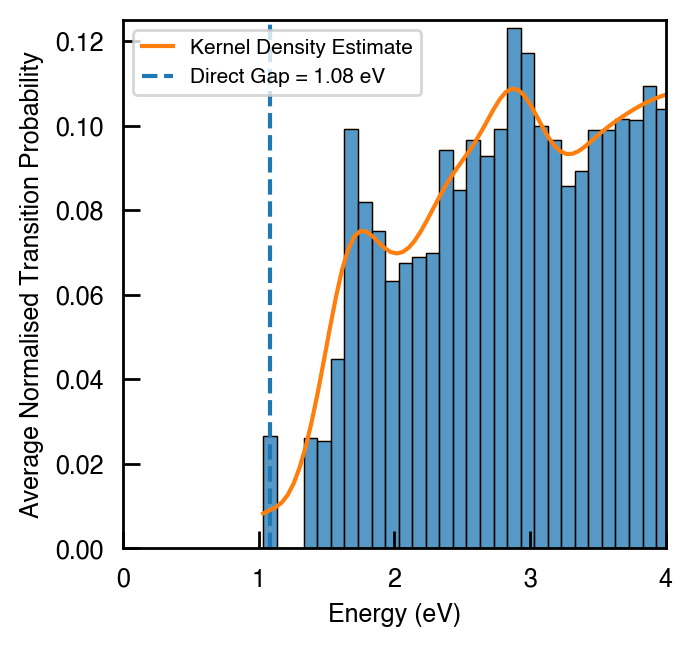

In [569]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(dpi=200)

maximum = np.max(cmc2_1_soc_weighted_tdms[cmc2_1_soc_energies<4]*((cmc2_1_soc_energies[cmc2_1_soc_energies<4])**2))

s, edges, _ = binned_statistic(cmc2_1_soc_energies, ((cmc2_1_soc_weighted_tdms)*cmc2_1_soc_energies**2)/maximum, statistic='mean',
                               bins=np.arange(0, 10.01, 0.1)) # binned from 0 to 5 eV in steps of 0.1 eV

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]

ax.set_xlim(0, 4)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Average Normalised Transition Probability") # Normalised TDM times E^2 prefactor per availabel transition. Binned sum of this gives the optical absorptioin
ax.set_ylim(0, 0.125)

sns.histplot(x=edges[:-1]+np.diff(edges)/3, weights=s, ax=ax, binwidth=0.1-0.0001, kde=True, kde_kws={"bw_adjust":0.15}, 
             color="C1", fill=False)
sns.histplot(x=edges[:-1]+np.diff(edges)/3, weights=s, ax=ax, binwidth=0.1-0.0001, color="C0")
ax.vlines(1.08, 0, 1, linestyles="dashed", label="Direct Gap = 1.08 eV")
ax.plot(100, 100, c="C1", label="Kernel Density Estimate")
ax.legend()
f.savefig("BS_DOSs/Cmc2_1_SOC_Average_Transition_Probability_Histogram.pdf", bbox_inches="tight", dpi=600)

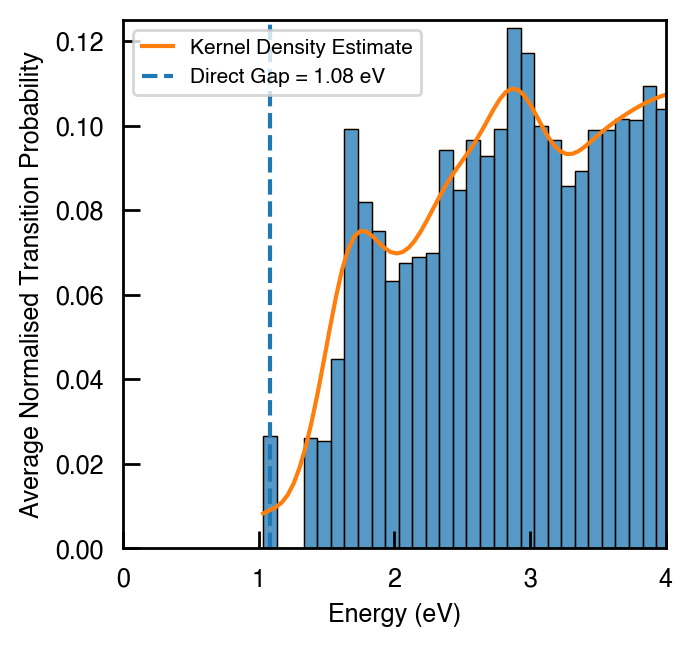

In [570]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(dpi=200)

maximum = np.max(cmc2_1_soc_weighted_tdms[cmc2_1_soc_energies<4]*((cmc2_1_soc_energies[cmc2_1_soc_energies<4])**2))

s, edges, _ = binned_statistic(cmc2_1_soc_energies, ((cmc2_1_soc_weighted_tdms)*cmc2_1_soc_energies**2)/maximum, statistic='mean',
                               bins=np.arange(0, 10.01, 0.1)) # binned from 0 to 5 eV in steps of 0.1 eV

ys = np.repeat(s,2)
xs = np.repeat(edges,2)[1:-1]

ax.set_xlim(0, 4)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Average Normalised Transition Probability") # Normalised TDM times E^2 prefactor per availabel transition. Binned sum of this gives the optical absorptioin
ax.set_ylim(0, 0.125)

sns.histplot(x=edges[:-1]+np.diff(edges)/3, weights=s, ax=ax, binwidth=0.1-0.0001, kde=True, kde_kws={"bw_adjust":0.15}, 
             color="C1", fill=False)
sns.histplot(x=edges[:-1]+np.diff(edges)/3, weights=s, ax=ax, binwidth=0.1-0.0001, color="C0")
ax.vlines(1.08, 0, 1, linestyles="dashed", label="Direct Gap = 1.08 eV")
ax.plot(100, 100, c="C1", label="Kernel Density Estimate")
ax.legend()
f.savefig("BS_DOSs/Cmc2_1_SOC_Average_Transition_Probability_Histogram.png", bbox_inches="tight", dpi=600)

Note that both JDOS and TDM act to give a slow onset which rapidly rises ~0.4 eV above the gap. This is typically the case for the JDOS, but usually not for the TDM, which is what gives rise to the particularly slow onset here

Plot histogram with heights equal to average TDM, and colourmapped to density? Nah too much going on, calm down

In [571]:
import matplotlib.pyplot as plt

import numpy as np

jdos = np.loadtxt("JDOS.dat")

absorp = np.loadtxt("BS_DOSs/HSE06_SOC_Cmc2_1_Absorption_g0.1.dat")

energies = jdos.transpose()[0]
jdos_dos = jdos.transpose()[1]

energies_abs = absorp.transpose()[0]
alpha = absorp.transpose()[1]

In [572]:
abs_sum = np.trapz(alpha[energies_abs <= 4], energies_abs[energies_abs <= 4])
jdos_sum = np.trapz(jdos_dos[energies <= 4], energies[energies <= 4])

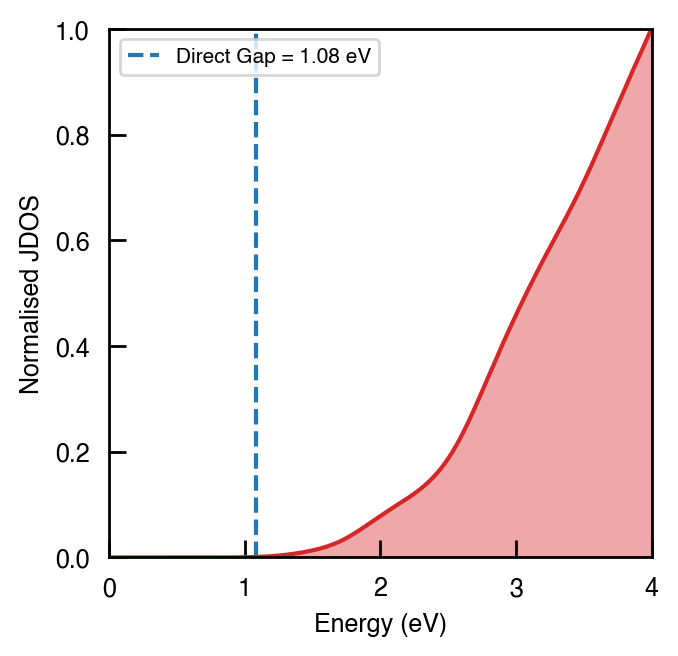

In [574]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,1, figsize=(3.5,3.5), dpi=200)
ax.plot(energies, 
        jdos_dos/jdos_dos[energies == find_nearest(energies, 4)], color="C3")
ax.fill_between(energies, 0,
        jdos_dos/jdos_dos[energies == find_nearest(energies, 4)], alpha=0.4, color="C3")
#ax.plot(energies_abs, 
##        alpha, 
#        label = "Normalised Optical Absorption")
ax.set_xlim(0, 4)
ax.set_ylim(0, 1)
ax.vlines(1.08, 0, 1, linestyles="dashed", label="Direct Gap = 1.08 eV")
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised JDOS")
ax.legend()
#ax.set_yticklabels([])
f.savefig("BS_DOSs/Cmc2_1_SOC_JDOS.pdf", bbox_inches="tight", dpi=600)

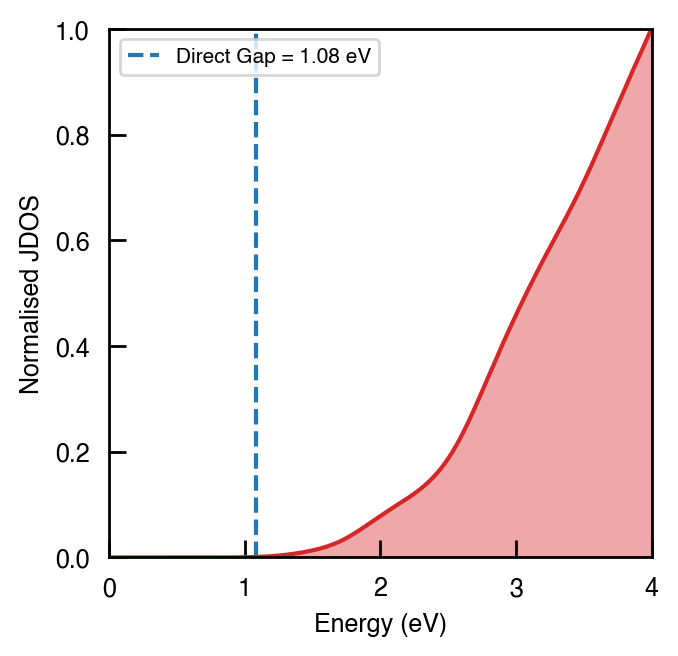

In [575]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,1, figsize=(3.5,3.5), dpi=200)
ax.plot(energies, 
        jdos_dos/jdos_dos[energies == find_nearest(energies, 4)], color="C3")
ax.fill_between(energies, 0,
        jdos_dos/jdos_dos[energies == find_nearest(energies, 4)], alpha=0.4, color="C3")
#ax.plot(energies_abs, 
##        alpha, 
#        label = "Normalised Optical Absorption")
ax.set_xlim(0, 4)
ax.set_ylim(0, 1)
ax.vlines(1.08, 0, 1, linestyles="dashed", label="Direct Gap = 1.08 eV")
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised JDOS")
ax.legend()
#ax.set_yticklabels([])
f.savefig("BS_DOSs/Cmc2_1_SOC_JDOS.png", bbox_inches="tight", dpi=600)

Blue + Red = Purple

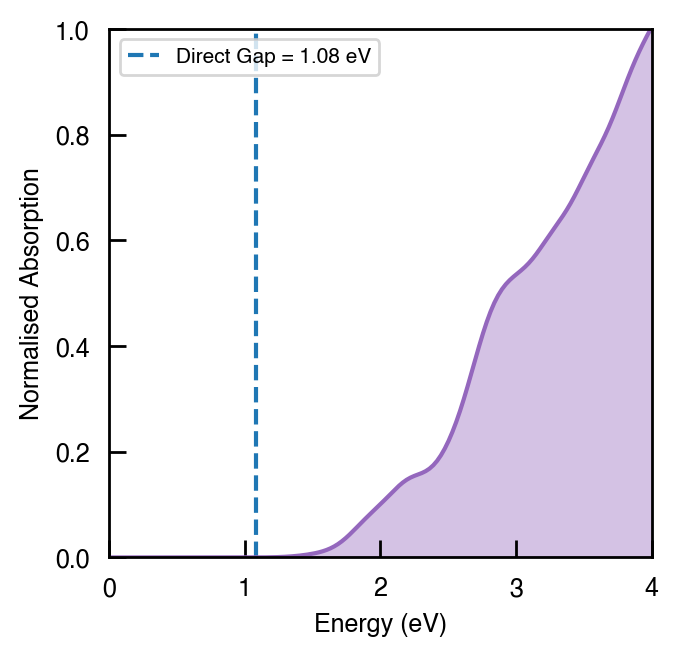

In [576]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,1, figsize=(3.5,3.5), dpi=200)
ax.plot(energies_abs, 
        alpha/alpha[energies_abs == find_nearest(energies_abs, 4)], color="C4")
ax.fill_between(energies_abs, 0,
        alpha/alpha[energies_abs == find_nearest(energies_abs, 4)], alpha=0.4, color="C4")
#ax.plot(energies_abs, 
##        alpha, 
#        label = "Normalised Optical Absorption")
ax.set_xlim(0, 4)
ax.set_ylim(0, 1)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised Absorption")
ax.vlines(1.08, 0, 1, linestyles="dashed", label="Direct Gap = 1.08 eV")
ax.legend()
#ax.set_yticklabels([])
f.savefig("BS_DOSs/Cmc2_1_SOC_Normalised_Absorption.pdf", bbox_inches="tight", dpi=600)

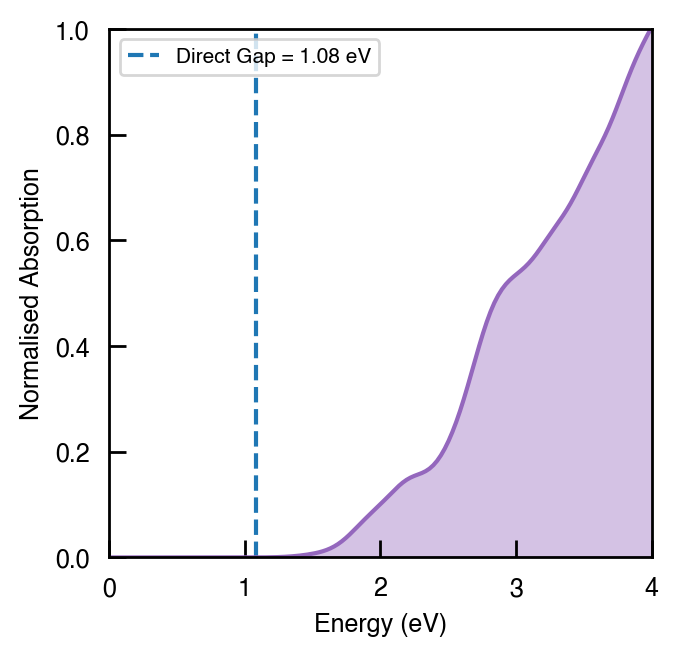

In [577]:
plt.style.use("../Packages/publication_style.mplstyle")
f, ax = plt.subplots(1,1, figsize=(3.5,3.5), dpi=200)
ax.plot(energies_abs, 
        alpha/alpha[energies_abs == find_nearest(energies_abs, 4)], color="C4")
ax.fill_between(energies_abs, 0,
        alpha/alpha[energies_abs == find_nearest(energies_abs, 4)], alpha=0.4, color="C4")
#ax.plot(energies_abs, 
##        alpha, 
#        label = "Normalised Optical Absorption")
ax.set_xlim(0, 4)
ax.set_ylim(0, 1)
ax.set_xlabel("Energy (eV)")
ax.set_ylabel("Normalised Absorption")
ax.vlines(1.08, 0, 1, linestyles="dashed", label="Direct Gap = 1.08 eV")
ax.legend()
#ax.set_yticklabels([])
f.savefig("BS_DOSs/Cmc2_1_SOC_Normalised_Absorption.png", bbox_inches="tight", dpi=600)

Would ya look at that, validated once again.

Plot histogram with heights equal to average TDM, and colourmapped to density

In [232]:
cmc2_1_SOC_WAVEDER.cder_data.shape

(424, 424, 72, 1, 3)

In [238]:
cmc2_1_SOC_WAVEDER.nelect

424

SSo what we want to show is:
- Cmcm optical absorption with direct gap labelled. 
- Cmcm nonSOC formally forbidden at Y:
    - Scatter plot nice way of showing both TDM and JDOS at once.
    - KDE / Histogram of average at given energy
    - Include plot of then summed binned weighted TDMS times E^2 to show it gives absorption plot shape I guess
- Cmc2_1 SOC:
    - Scatter plot nice way of showing both TDM and JDOS at once.
    - KDE / Histogram of average at given energy
    - Include plot of then summed binned weighted TDMS times E^2 to show it gives absorption plot shape I guess